In [1]:
import dataset
from matplotlib import colors
from matplotlib import pyplot
import pandas as pd
import numpy as np

pca = 5
recategorize=True
background=False
IndianPines = dataset.load_IndianPines(pca, recategorize, background)

In [2]:
dir(IndianPines)

['DESCR',
 'cordinate_names',
 'cordinates',
 'feature_names',
 'features',
 'filename',
 'hex_names',
 'target',
 'target_names']

In [20]:
cordinates_df = pd.DataFrame(IndianPines.cordinates, columns=IndianPines.cordinate_names)
features_df = pd.DataFrame(IndianPines.features, columns=IndianPines.feature_names)
target_df = pd.DataFrame(IndianPines.target_names[IndianPines.target],columns=['category'])
hex_df = pd.DataFrame(IndianPines.hex_names[IndianPines.target],columns=['hex-color'])
data_df = pd.concat([cordinates_df,features_df,target_df,hex_df],axis=1)
data_df = data_df.set_index(['column#','line#'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10320 entries, (0, 0) to (143, 32)
Data columns (total 7 columns):
PC1          10320 non-null float64
PC2          10320 non-null float64
PC3          10320 non-null float64
PC4          10320 non-null float64
PC5          10320 non-null float64
category     10320 non-null object
hex-color    10320 non-null object
dtypes: float64(5), object(2)
memory usage: 607.0+ KB


In [21]:
# Variable 'PC2'  of  head 5 samples
display(data_df['PC2'].head(10))

column#  line#
0        0        0.568190
         1       -0.644221
         2       -1.011396
         3       -0.764560
         4        0.154656
         5        1.420347
         6        2.019141
         7        1.283642
         8        0.505570
         9        0.684659
Name: PC2, dtype: float64

In [22]:
# datas of  sample cordicates(10,30) 
display(data_df.loc[(10,30)])

PC1          0.891344
PC2           1.88493
PC3          -1.26528
PC4         -0.561144
PC5         -0.261861
category     Soybeans
hex-color     #da70d6
Name: (10, 30), dtype: object

In [23]:
display(pd.DataFrame(target_df['category'].value_counts()))

,category
Soybeans,4050
Corn,2502
Woods,1294
Grass,1244
Hay-windrowed,489
Bldg-Grass-Tree-Drives,380
Wheat,212
Stone-steel towers,95
Alfalfa,54


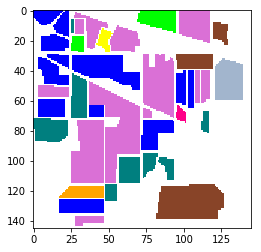

In [24]:
if background == False:
   new_cordinates = pd.DataFrame([(x, y) for x in range(0,145) for y in range(0,145)],columns=['column#','line#'])
   hex_old_cordinates = pd.concat([cordinates_df,hex_df],axis=1)
   cordinates_hex = pd.merge(new_cordinates, hex_old_cordinates,on=['column#','line#'],how='left')
   cordinates_hex = cordinates_hex.fillna('#ffffff')
   hex_df = cordinates_hex

pyplot.imshow(colors.to_rgba_array(hex_df['hex-color'].values).reshape([145,145,4]))
                                                                